In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [2]:
lensData=np.loadtxt(r"Z:\Shared\Kagome\Data\not_qcontrol\2020\07\29\sequence_intensity_profile.txt").transpose()
beamData=np.load(r"Z:\Shared\Kagome\Data\not_qcontrol\2020\07\29\ThermalLensingDipoleLoadSequence.npy")
tmin=max(lensData[0,0],beamData[0,0])
tmax=min(lensData[0,-1],beamData[0,-1])
tmin,tmax

(1596041151.2049136, 1596041278.8225467)

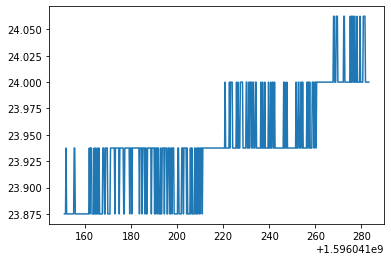

In [3]:
plt.plot(lensData[0],lensData[1])

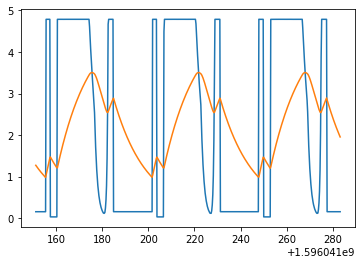

In [4]:

plt.plot(lensData[0],lensData[3])
plt.plot(lensData[0],lensData[4])

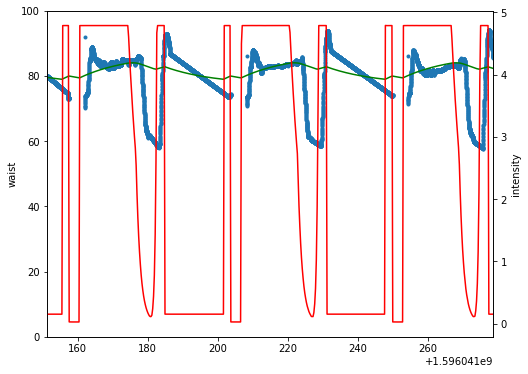

In [53]:
plt.figure(figsize=(8,6))
waistHorizontalInterpolate=interp1d(beamData[0],beamData[3])
intensityInterpolate=interp1d(lensData[0],lensData[3])

time=np.linspace(tmin,tmax,10000)
time=time[intensityInterpolate(time)>0.05]
plt.plot(time,waistHorizontalInterpolate(time),".")
plt.ylim(-0,100)
plt.xlim(tmin,tmax)
plt.ylabel("waist")
plt.plot(lensData[0],77+lensData[4]*2,"g")
ax=plt.twinx()
plt.xlabel("time")
ax.set_ylabel("intensity")
ax.plot(lensData[0],lensData[3],"r")